In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r"D:\Meta scifor\Machine Learning\Datasets\Advertising.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


### Splitting the data into train and test set

In [7]:
X=df.drop(["Sales"],axis=1)
y=df['Sales']

In [8]:
X.shape, y.shape

((200, 3), (200,))

In [9]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1)

In [10]:
print(X_train.shape, X_test.shape)

(160, 3) (40, 3)


### 1. Linear Regression Model

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
linear_regressor=LinearRegression()

In [13]:
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred=linear_regressor.predict(X_test)

In [18]:
from sklearn import metrics

In [19]:
print(dir(metrics))

['ConfusionMatrixDisplay', 'DetCurveDisplay', 'DistanceMetric', 'PrecisionRecallDisplay', 'PredictionErrorDisplay', 'RocCurveDisplay', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_base', '_classification', '_dist_metrics', '_pairwise_distances_reduction', '_pairwise_fast', '_plot', '_ranking', '_regression', '_scorer', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'check_scoring', 'class_likelihood_ratios', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'd2_absolute_error_score', 'd2_pinball_score', 'd2_tweedie_score', 'davies_bouldin_score', 'dcg_score', 'det_curve', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [23]:
mse_lr=mean_squared_error(y_test, y_pred)
mse_lr

1.9918855518287906

In [26]:
import math
print("RMSE", math.sqrt(mse_lr))

RMSE 1.4113417558581587


In [27]:
mae_lr=mean_absolute_error(y_test, y_pred)
mae_lr

1.0402154012924718

### Decision Tree Regressor

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
DT_regressor=DecisionTreeRegressor()

In [30]:
DT_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [31]:
y_pred_DT=DT_regressor.predict(X_test)

In [32]:
mse_DT=mean_squared_error(y_test, y_pred_DT)
mse_DT

0.8967500000000002

In [35]:
mae_DT=mean_absolute_error(y_test,y_pred_DT)
mae_DT

0.7325000000000003

In [34]:
print("RMSE in DT Regressor", math.sqrt(mse_DT))

RMSE in DT Regressor 0.9469688484844685


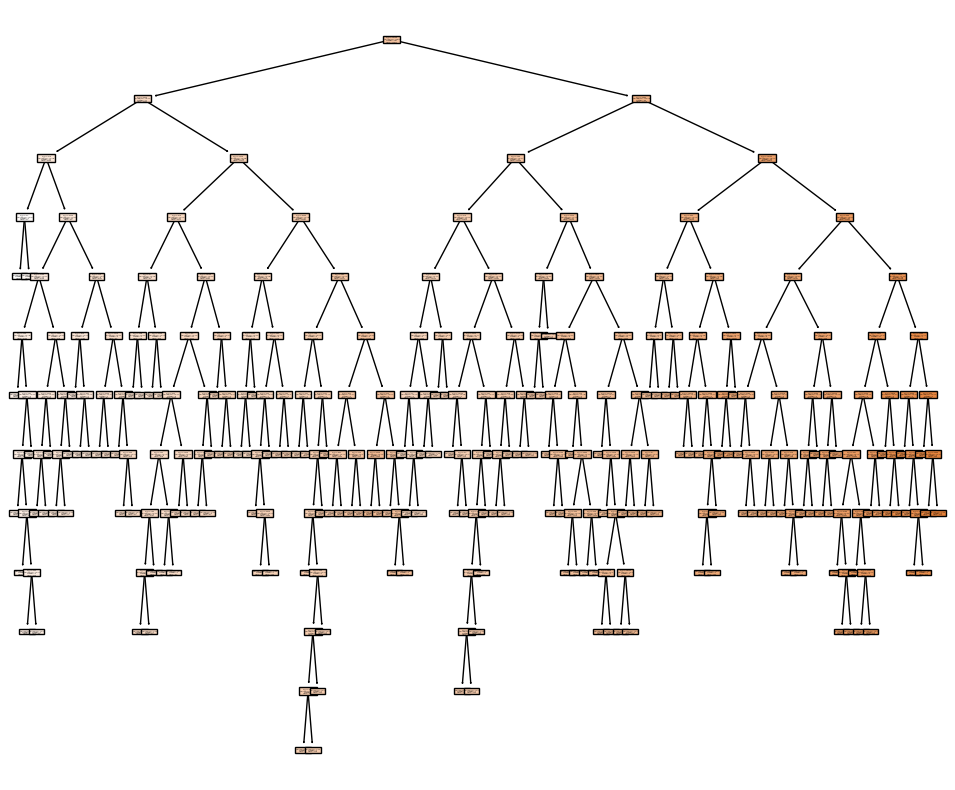

In [37]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(DT_regressor,filled=True)
plt.show()